In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
!pip install gdown
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 11XGZ3ZY-TrGmVh_DErn76oYtTXTZr4zI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11XGZ3ZY-TrGmVh_DErn76oYtTXTZr4zI
To: /content/ObesityDataSet_raw_and_data_sinthetic.csv
100% 264k/264k [00:00<00:00, 121MB/s]


In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Initial Preproccess

In [ ]:
x_list = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']
y_list = ['NObeyesdad']

In [ ]:
y = df[y_list]
df = df.drop(y_list, axis = 1)

In [ ]:
x_nonumeric = df.columns[df.dtypes == "object"].values
x_categorical = np.array(['CAEC', 'CALC', 'MTRANS'])
x_yesno = np.array(['Gender', 'family_history_with_overweight', 'FAVC','SMOKE', 'SCC'])
x_nonumeric

array(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
       'SMOKE', 'SCC', 'CALC', 'MTRANS'], dtype=object)

In [ ]:
for _ in x_nonumeric:
  print(df[_].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
X_dummies = pd.get_dummies(df[x_categorical])


In [ ]:
X = df.drop(x_categorical, axis =1).join(X_dummies)

#transform yes no
le = preprocessing.LabelEncoder()
for i in x_yesno:
    X[i] = le.fit_transform(X[i].astype(str))

#multiply before turning to int
X["Height"] = (X["Height"]*100).astype('int')
X["TUE"] = (X["TUE"]*100).astype('int')
X["FAF"] = (X[ "FAF"]*100).astype('int')
X["CH2O"] = (X["CH2O"]*100).astype('int')

X = X.astype('int')
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,162,64,1,0,2,3,0,200,...,0,0,0,0,1,0,0,0,1,0
1,0,21,152,56,1,0,3,3,1,300,...,0,0,0,1,0,0,0,0,1,0
2,1,23,180,77,1,0,2,3,0,200,...,0,0,1,0,0,0,0,0,1,0
3,1,27,180,87,0,0,3,3,0,200,...,0,0,1,0,0,0,0,0,0,1
4,1,22,178,89,0,0,2,1,0,200,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,171,131,1,1,3,3,0,172,...,0,0,0,1,0,0,0,0,1,0
2107,0,21,174,133,1,1,3,3,0,200,...,0,0,0,1,0,0,0,0,1,0
2108,0,22,175,133,1,1,3,3,0,205,...,0,0,0,1,0,0,0,0,1,0
2109,0,24,173,133,1,1,3,3,0,285,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y['NObeyesdad'] = le.fit_transform(y['NObeyesdad'].astype(str))
y


,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


# GAN

---

## Setup

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from numpy.random import randn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# # from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
!pip install tabgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_list = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']
y_list = ['NObeyesdad']

In [ ]:
dfGAN = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
dfGAN.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Most of the non numeric columns are ordinal data type so I can convert it to integer

In [ ]:
le = preprocessing.LabelEncoder()
for i in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    dfGAN[i] = le.fit_transform(dfGAN[i].astype(str))

print(dfGAN['MTRANS'].unique())
print(df['MTRANS'].unique())

[3 4 0 2 1]
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


---

## With Tensor

---

### Latent Point function

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))

    return X, y

# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = dfGAN.sample(n)
    y = np.ones((n, 1))
    return X, y

### Generator, Discriminator, and GAN Function

In [ ]:
def define_generator(latent_dim, n_outputs=17):
    model = Sequential()
    model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [ ]:
generator1 = define_generator(18, 17)
generator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 17)                527       
                                                                 
Total params: 1,292
Trainable params: 1,292
Non-trainable params: 0
_________________________________________________________________


#### Discriminator Function

In [ ]:
def define_discriminator(n_inputs=17):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
discriminator1 = define_discriminator(17)
discriminator1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                450       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


#### GAN Function (Combine Generator and Discriminator)

In [ ]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

#### Train Function

In [ ]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=200):
    # determine half the size of one batch, for updating the  discriminator
    half_batch = int(n_batch / 2)
    d_history = []
    g_history = []
    # manually enumerate epochs
    for epoch in range(n_epochs):

      # prepare real samples
      x_real, y_real = generate_real_samples(half_batch)

      # prepare fake examples
      x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

      # update discriminator
      d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
      d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # prepare points in latent space as input for the generator
      x_gan = generate_latent_points(latent_dim, n_batch)

      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))

      # update the generator via the discriminator's error
      g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)
      print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))

      d_history.append(d_loss)
      g_history.append(g_loss_fake)

    plot_history(d_history, g_history)
    g_model.save('trained_generated_model.h5')

### Train

In [ ]:
# size of the latent space
latent_dim = 17
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim, 10000)

#### Load Model and Predict

In [ ]:
from keras.models import load_model
!gdown --id 1YZHV8e0OpGv5mOBAL9E_jRiRcCi9kgCz

model =load_model('trained_generated_model.h5')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YZHV8e0OpGv5mOBAL9E_jRiRcCi9kgCz
To: /content/trained_generated_model.h5
100% 22.0k/22.0k [00:00<00:00, 85.2MB/s]


In [ ]:
latent_points = generate_latent_points(17, 2000)
GAN = model.predict(latent_points)

data_fake = pd.DataFrame(data=GAN,  columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'])
data_fake.describe()

63/63 [==============================] - 3s 1ms/step


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.243909,19.820061,1.494335,75.968208,0.828319,0.809344,3.578166,3.815076,2.290532,0.168199,2.138662,-0.358098,0.658773,0.613214,1.516434,1.971419,3.823104
std,0.123312,6.412018,0.516680,35.410721,0.313437,0.346977,1.350327,1.554534,0.815757,0.077848,0.640420,0.238190,0.286920,0.768310,0.499364,1.261291,1.344469
min,-0.729041,7.824185,0.629189,25.526192,0.298938,0.145434,1.494558,1.451058,0.919064,-0.244838,0.880745,-1.471306,0.158589,-1.422066,0.643496,-0.949526,1.524348
25%,-0.311835,14.994011,1.115247,49.372865,0.596266,0.562188,2.597759,2.677459,1.687109,0.129041,1.657984,-0.475698,0.441320,0.103498,1.142933,1.105048,2.830369
50%,-0.215080,18.763940,1.388964,65.805889,0.764586,0.733954,3.243533,3.410964,2.119725,0.165833,2.041960,-0.287663,0.604508,0.378139,1.416480,1.757692,3.545928
75%,-0.147092,23.400289,1.763196,92.897400,0.992757,0.986956,4.228592,4.560745,2.705708,0.214550,2.516040,-0.181760,0.830658,1.067555,1.792207,2.655669,4.522917
max,-0.042619,50.312714,3.808725,230.998306,2.167783,2.284804,9.591113,10.744326,5.854827,0.414171,4.678752,-0.049326,2.412509,3.543798,3.643579,6.918654,9.611702


### Benerin hasil GAN

#### Optimize result

In [ ]:
def remove_outliers(dataframe, threshold=3):
    """
    Removes outliers from each column of the given DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        threshold (float): The threshold value to determine outliers (default: 3).

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    z_scores = np.abs((dataframe - dataframe.mean()) / dataframe.std())
    df_cleaned = dataframe[(z_scores < threshold).all(axis=1)]

    return df_cleaned



In [ ]:
fixed_fake = remove_outliers(data_fake)

Scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_ranges = {'Gender': (0, 1),
                'Age': (14, 61),
                'Height': (1.45, 1.98),
                'Weight': (39, 173),
                'family_history_with_overweight': (0, 1),
                'FAVC': (0, 1),
                'FCVC': (1, 3),
                'NCP': (1, 4),
                'CAEC': (2, 3),
                'SMOKE': (0, 1),
                'CH2O': (1.584812, 2.47742),
                'SCC': (0, 1),
                'FAF': (0.124505, 1.666678),
                'TUE': (0, 0.62535),
                'CALC': (0, 3),
                'MTRANS': (0, 4),
                'NObeyesdad': (0, 6)}

# Initialize the MinMaxScaler with the desired scale ranges
scaler = MinMaxScaler()

for column, (scale_min, scale_max) in scale_ranges.items():
    column_data = fixed_fake[[column]]
    column_data_scaled = scaler.fit_transform(column_data) * (scale_max - scale_min) + scale_min
    fixed_fake[column] = column_data_scaled.flatten()

fixed_fake.describe()

<ipython-input-33-7db9ad477811>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_fake[column] = column_data_scaled.flatten()
<ipython-input-33-7db9ad477811>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_fake[column] = column_data_scaled.flatten()
<ipython-input-33-7db9ad477811>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000
mean,0.659724,31.943218,1.639978,81.956459,0.355725,0.366677,1.660067,1.992496,2.355901,0.542448,1.938011,0.707051,0.679096,0.249816,1.158133,1.560452,2.151384
std,0.199356,8.854008,0.107089,28.644764,0.198325,0.205483,0.405217,0.620182,0.199873,0.156678,0.168080,0.216758,0.308989,0.125007,0.614490,0.835178,1.190733
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000
25%,0.537935,25.104485,1.560249,59.764732,0.205423,0.216530,1.358660,1.529237,2.205572,0.452052,1.809961,0.589316,0.440334,0.162682,0.691011,0.963556,1.248326
50%,0.703443,30.851725,1.619731,74.299881,0.317898,0.324049,1.565711,1.846820,2.317186,0.534446,1.918162,0.768809,0.623621,0.210089,1.055100,1.420838,1.936010
75%,0.818360,37.596809,1.702199,97.376190,0.472488,0.481504,1.873907,2.314316,2.465867,0.639662,2.049952,0.871919,0.874182,0.328752,1.528982,2.047675,2.856320
max,1.000000,60.999996,1.980000,173.000015,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,2.477420,1.000000,1.666678,0.625350,3.000000,4.000000,6.000000


#### preprocess

In [ ]:
int_cols = ['Gender', 'Age', 'Weight','family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']


fixed_fake[int_cols] = fixed_fake[int_cols].astype('int')
fixed_fake

<ipython-input-34-d4d8b726f379>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_fake[int_cols] = fixed_fake[int_cols].astype('int')


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,33,1.715378,109,0,0,1,2,2,0,1.972185,0,0.346309,0.410173,1,2,2
1,0,37,1.782069,125,0,0,2,2,2,0,2.065138,0,0.422062,0.465253,1,2,3
2,0,20,1.518626,58,0,0,1,1,2,0,1.715198,0,0.460501,0.192507,0,1,0
3,0,35,1.723677,111,0,0,2,2,2,0,2.012056,0,0.465884,0.406466,1,2,3
4,0,29,1.608955,74,0,0,1,1,2,0,1.882358,0,0.821189,0.203772,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,45,1.839707,135,0,0,2,3,2,0,2.248982,0,0.651518,0.444590,2,3,4
1996,0,38,1.770109,123,0,0,2,2,2,0,2.077065,0,0.497018,0.432270,1,2,3
1997,0,42,1.634892,55,0,0,1,1,2,0,2.041873,0,0.910258,0.069381,1,0,1
1998,0,54,1.742738,72,0,0,1,2,2,0,2.257163,0,1.404856,0.073708,2,0,2


back to category

In [ ]:
# Assuming you have a DataFrame column called 'column_name' with values 1, 2, 3, 4
mapping1 = {2: 'Sometimes', 1: 'Frequently', 0: 'Always', 3: 'no'}
mapping2 = {3: 'no', 2: 'Sometimes', 1: 'Frequently', 0: 'Always'}
mapping3 = {3: 'Public_Transportation', 4: 'Walking', 0: 'Automobile', 2: 'Motorbike', 1: 'Bike'}

# Replace the values using the defined mapping
fixed_fake['CAEC'] = fixed_fake['CAEC'].replace(mapping1)
fixed_fake['CALC'] = fixed_fake['CALC'].replace(mapping2)
fixed_fake['MTRANS'] = fixed_fake['MTRANS'].replace(mapping3)

fixed_fake

<ipython-input-35-582925cc807f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_fake['CAEC'] = fixed_fake['CAEC'].replace(mapping1)
<ipython-input-35-582925cc807f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_fake['CALC'] = fixed_fake['CALC'].replace(mapping2)
<ipython-input-35-582925cc807f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,33,1.715378,109,0,0,1,2,Sometimes,0,1.972185,0,0.346309,0.410173,Frequently,Motorbike,2
1,0,37,1.782069,125,0,0,2,2,Sometimes,0,2.065138,0,0.422062,0.465253,Frequently,Motorbike,3
2,0,20,1.518626,58,0,0,1,1,Sometimes,0,1.715198,0,0.460501,0.192507,Always,Bike,0
3,0,35,1.723677,111,0,0,2,2,Sometimes,0,2.012056,0,0.465884,0.406466,Frequently,Motorbike,3
4,0,29,1.608955,74,0,0,1,1,Sometimes,0,1.882358,0,0.821189,0.203772,Always,Bike,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,45,1.839707,135,0,0,2,3,Sometimes,0,2.248982,0,0.651518,0.444590,Sometimes,Public_Transportation,4
1996,0,38,1.770109,123,0,0,2,2,Sometimes,0,2.077065,0,0.497018,0.432270,Frequently,Motorbike,3
1997,0,42,1.634892,55,0,0,1,1,Sometimes,0,2.041873,0,0.910258,0.069381,Frequently,Automobile,1
1998,0,54,1.742738,72,0,0,1,2,Sometimes,0,2.257163,0,1.404856,0.073708,Sometimes,Automobile,2


dummy

In [ ]:
x_categorical #from preprocessing
fake_dummies = pd.get_dummies(fixed_fake[x_categorical])
Y_fake = fixed_fake["NObeyesdad"]
fixed_fake = fixed_fake.drop("NObeyesdad", axis=1)
fixed_fake = fixed_fake.drop(x_categorical, axis =1).join(X_dummies)

#lesgoooooo
fixed_fake

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,33,1.715378,109,0,0,1,2,0,1.972185,...,0,0,0,0,1,0,0,0,1,0
1,0,37,1.782069,125,0,0,2,2,0,2.065138,...,0,0,0,1,0,0,0,0,1,0
2,0,20,1.518626,58,0,0,1,1,0,1.715198,...,0,0,1,0,0,0,0,0,1,0
3,0,35,1.723677,111,0,0,2,2,0,2.012056,...,0,0,1,0,0,0,0,0,0,1
4,0,29,1.608955,74,0,0,1,1,0,1.882358,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,45,1.839707,135,0,0,2,3,0,2.248982,...,0,0,0,1,0,0,0,0,1,0
1996,0,38,1.770109,123,0,0,2,2,0,2.077065,...,0,0,0,1,0,0,0,0,1,0
1997,0,42,1.634892,55,0,0,1,1,0,2.041873,...,0,0,0,1,0,0,0,0,1,0
1998,0,54,1.742738,72,0,0,1,2,0,2.257163,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
fixed_fake["Height"] = (fixed_fake["Height"]*100).astype('int')
fixed_fake["TUE"] = (fixed_fake["TUE"]*100).astype('int')
fixed_fake["FAF"] = (fixed_fake[ "FAF"]*100).astype('int')
fixed_fake["CH2O"] = (fixed_fake["CH2O"]*100).astype('int')

fixed_fake = fixed_fake.astype('int')

In [ ]:
Y_fake

0       2
1       3
2       0
3       3
4       1
       ..
1995    4
1996    3
1997    1
1998    2
1999    1
Name: NObeyesdad, Length: 1929, dtype: int64

In [ ]:
#ini broooo bisa langsung gas dipake
fixed_fake

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,33,171,109,0,0,1,2,0,197,...,0,0,0,0,1,0,0,0,1,0
1,0,37,178,125,0,0,2,2,0,206,...,0,0,0,1,0,0,0,0,1,0
2,0,20,151,58,0,0,1,1,0,171,...,0,0,1,0,0,0,0,0,1,0
3,0,35,172,111,0,0,2,2,0,201,...,0,0,1,0,0,0,0,0,0,1
4,0,29,160,74,0,0,1,1,0,188,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,45,183,135,0,0,2,3,0,224,...,0,0,0,1,0,0,0,0,1,0
1996,0,38,177,123,0,0,2,2,0,207,...,0,0,0,1,0,0,0,0,1,0
1997,0,42,163,55,0,0,1,1,0,204,...,0,0,0,1,0,0,0,0,1,0
1998,0,54,174,72,0,0,1,2,0,225,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_GAN = pd.concat([X, fixed_fake], ignore_index=True)


series = pd.Series(Y_fake)

# Convert Series to DataFrame with column name
column_name = 'NObeyesdad'
Y_gen = pd.DataFrame({column_name: series})

Y_GAN = pd.concat([y, Y_gen], ignore_index=True)
Y_GAN = pd.DataFrame(Y_GAN)

# print(y)
# print(Y_gen.shape)
# print(y.shape)
# print(Y_GAN.shape)

print(type(Y_GAN))
Y_GAN

<class 'pandas.core.frame.DataFrame'>


,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
4035,4
4036,3
4037,1
4038,2


# FEATURE SELECTION ###

In [ ]:
from scipy.stats import f_oneway
import seaborn as sns

### Analysis

In [ ]:
XY = X_GAN.join(Y_GAN)
XY

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21,162,64,1,0,2,3,0,200,...,0,0,0,1,0,0,0,1,0,1
1,0,21,152,56,1,0,3,3,1,300,...,0,0,1,0,0,0,0,1,0,1
2,1,23,180,77,1,0,2,3,0,200,...,0,1,0,0,0,0,0,1,0,1
3,1,27,180,87,0,0,3,3,0,200,...,0,1,0,0,0,0,0,0,1,5
4,1,22,178,89,0,0,2,1,0,200,...,0,0,1,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0,45,183,135,0,0,2,3,0,224,...,0,0,1,0,0,0,0,1,0,4
4036,0,38,177,123,0,0,2,2,0,207,...,0,0,1,0,0,0,0,1,0,3
4037,0,42,163,55,0,0,1,1,0,204,...,0,0,1,0,0,0,0,1,0,1
4038,0,54,174,72,0,0,1,2,0,225,...,0,0,1,0,0,0,0,1,0,2


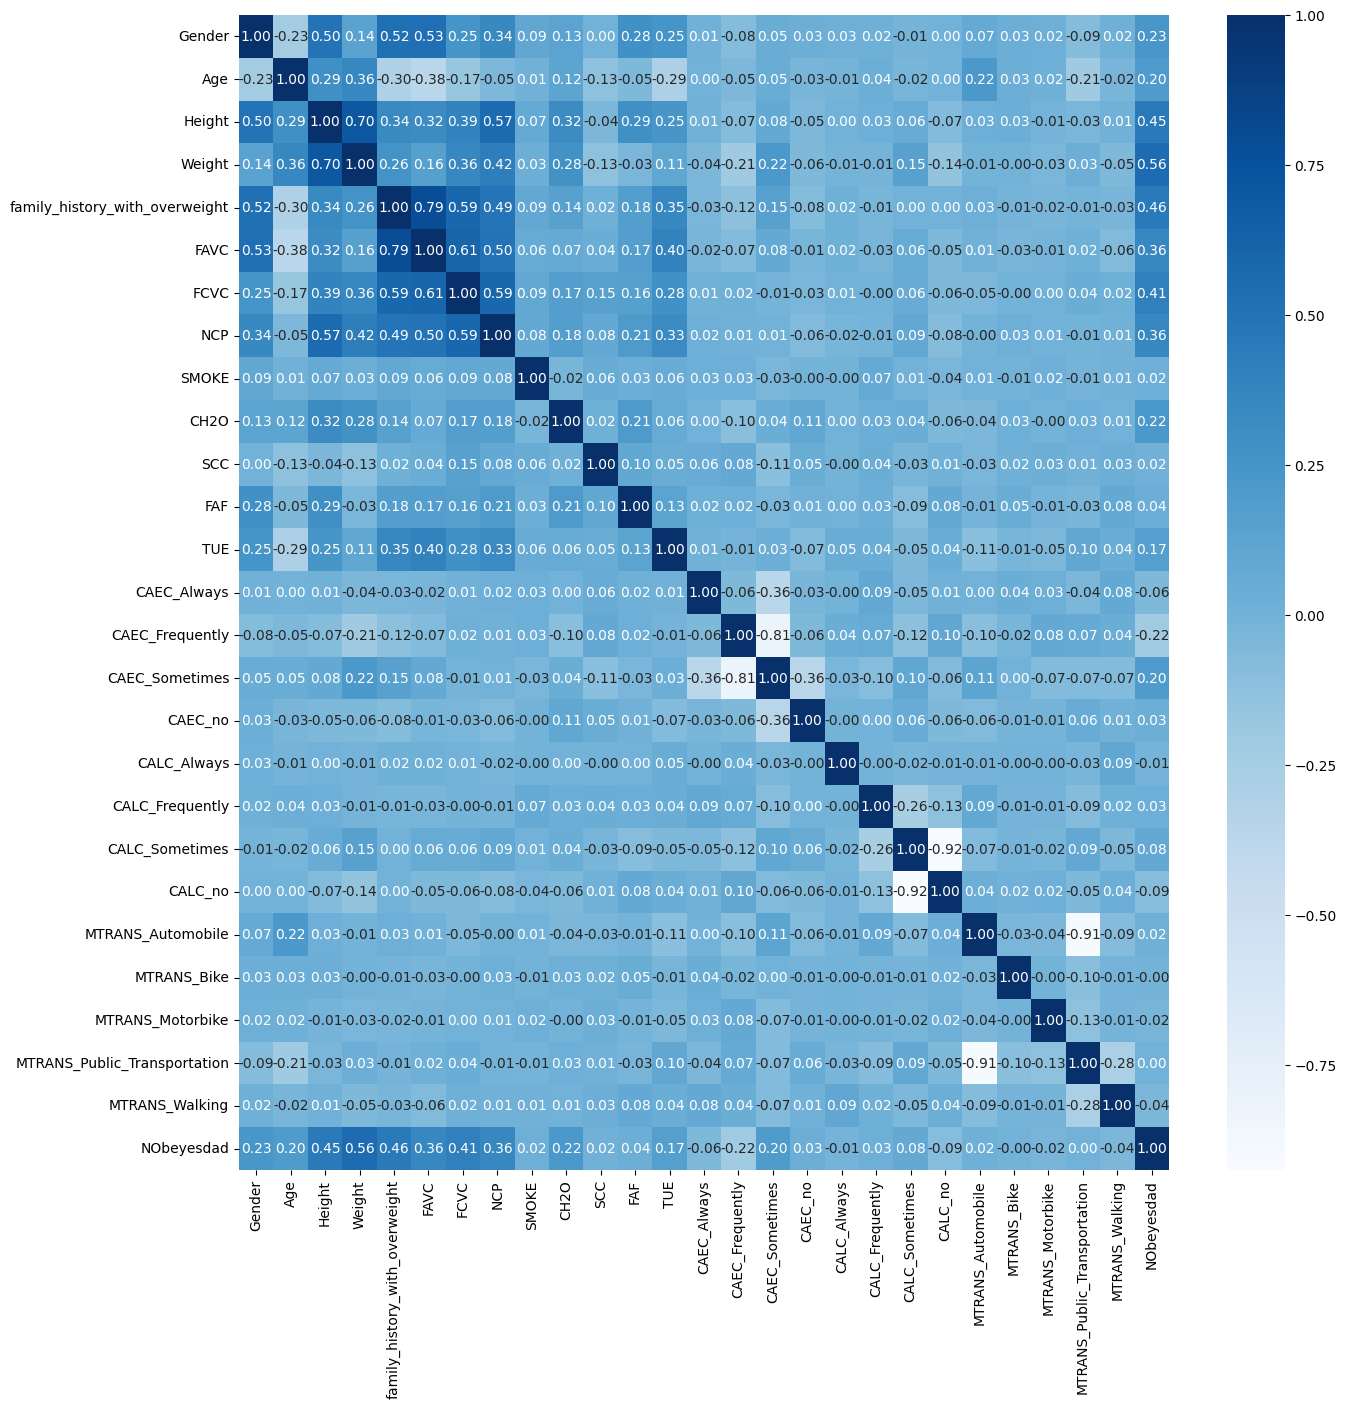

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(XY.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
XY.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
Gender,1.000000,-0.230070,0.497554,0.141353,0.519856,0.531529,0.250681,0.339423,0.091388,0.130207,...,0.026232,0.016070,-0.011734,0.004831,0.073207,0.031468,0.024237,-0.085747,0.021327,0.234942
Age,-0.230070,1.000000,0.290666,0.356696,-0.303418,-0.375147,-0.169076,-0.045682,0.014700,0.120085,...,-0.012121,0.035294,-0.017841,0.004833,0.222365,0.030530,0.017129,-0.209693,-0.022941,0.202630
Height,0.497554,0.290666,1.000000,0.702274,0.335057,0.317039,0.389156,0.566862,0.072977,0.319901,...,0.004812,0.027014,0.060042,-0.072517,0.026054,0.031704,-0.008507,-0.032724,0.013893,0.452253
Weight,0.141353,0.356696,0.702274,1.000000,0.264157,0.163677,0.361016,0.424722,0.033807,0.275318,...,-0.010871,-0.011794,0.145724,-0.144736,-0.005592,-0.000663,-0.029909,0.030489,-0.054115,0.556144
family_history_with_overweight,0.519856,-0.303418,0.335057,0.264157,1.000000,0.785671,0.589037,0.490983,0.089514,0.144351,...,0.018219,-0.014782,0.004501,0.000582,0.029679,-0.008355,-0.023111,-0.012226,-0.029548,0.456628
FAVC,0.531529,-0.375147,0.317039,0.163677,0.785671,1.000000,0.608436,0.499863,0.062519,0.073185,...,0.016984,-0.025064,0.062150,-0.054566,0.007910,-0.029286,-0.014582,0.021981,-0.062343,0.355766
FCVC,0.250681,-0.169076,0.389156,0.361016,0.589037,0.608436,1.000000,0.589202,0.086399,0.173793,...,0.006047,-0.004367,0.058288,-0.058385,-0.051043,-0.000611,0.000561,0.040395,0.021790,0.409850
NCP,0.339423,-0.045682,0.566862,0.424722,0.490983,0.499863,0.589202,1.000000,0.082415,0.179538,...,-0.017754,-0.008530,0.085982,-0.084394,-0.003227,0.026041,0.005219,-0.005101,0.010218,0.359082
SMOKE,0.091388,0.014700,0.072977,0.033807,0.089514,0.062519,0.086399,0.082415,1.000000,-0.020267,...,-0.001670,0.070543,0.007415,-0.035373,0.005855,-0.006259,0.024195,-0.013032,0.011440,0.023369
CH2O,0.130207,0.120085,0.319901,0.275318,0.144351,0.073185,0.173793,0.179538,-0.020267,1.000000,...,0.001008,0.033510,0.044832,-0.059317,-0.037283,0.026254,-0.000092,0.029831,0.005582,0.219124


In [ ]:
res = XY.corr()['NObeyesdad']
res = res.abs()

In [ ]:
res = res.sort_values(ascending = False)
res

NObeyesdad                        1.000000
Weight                            0.556144
family_history_with_overweight    0.456628
Height                            0.452253
FCVC                              0.409850
NCP                               0.359082
FAVC                              0.355766
Gender                            0.234942
CH2O                              0.219124
CAEC_Frequently                   0.215263
Age                               0.202630
CAEC_Sometimes                    0.196002
TUE                               0.169189
CALC_no                           0.091094
CALC_Sometimes                    0.077493
CAEC_Always                       0.055218
MTRANS_Walking                    0.040023
FAF                               0.035838
CAEC_no                           0.030528
CALC_Frequently                   0.030103
MTRANS_Motorbike                  0.024563
SMOKE                             0.023369
MTRANS_Automobile                 0.018606
SCC        

### Selecting

In [ ]:
select_feature = res.index[1:13]
select_index = [3, 4, 2, 6, 5, 7, 0, 9, 13, 14, 1, 12]

select_feature

Index(['Weight', 'family_history_with_overweight', 'Height', 'FCVC', 'NCP',
       'FAVC', 'Gender', 'CH2O', 'CAEC_Frequently', 'Age', 'CAEC_Sometimes',
       'TUE'],
      dtype='object')

In [ ]:
X_feat = X_GAN[select_feature]
X_feat

,Weight,family_history_with_overweight,Height,FCVC,NCP,FAVC,Gender,CH2O,CAEC_Frequently,Age,CAEC_Sometimes,TUE
0,64,1,162,2,3,0,0,200,0,21,1,100
1,56,1,152,3,3,0,0,300,0,21,1,0
2,77,1,180,2,3,0,1,200,0,23,1,100
3,87,0,180,3,3,0,1,200,0,27,1,0
4,89,0,178,2,1,0,1,200,0,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4035,135,0,183,2,3,0,0,224,0,45,1,44
4036,123,0,177,2,2,0,0,207,0,38,1,43
4037,55,0,163,1,1,0,0,204,0,42,1,6
4038,72,0,174,1,2,0,0,225,0,54,1,7


In [ ]:
# import numpy as np
# import pandas as pd
# import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Decision Tree Method#


In [ ]:
from sklearn.model_selection import KFold


###Node Class###

In [ ]:
class Node():
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value = None):

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

###Tree Class###

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split = 2, max_depth = 2):

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth = 0):
        '''recursive function to build a tree'''

        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)


        # split until stopping conditions are met
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_features)
            # check if information gain is positive
            if best_split['info_gain'] > 0 :
                # recur left
                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth +1)
                # recur right
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth + 1)
                # return decision node
                return Node(best_split['feature_index'], best_split['threshold'], left_subtree, right_subtree, best_split['info_gain'])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value = leaf_value)

    def get_best_split(self, dataset, num_features):
        '''function to find the best split'''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float('inf')

        # loop over all features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_threshold = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_threshold:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # conpute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, 'gini')
                    # update the best split if needed
                    if curr_info_gain > max_info_gain:
                        best_split['feature_index'] = feature_index
                        best_split['threshold'] = threshold
                        best_split['dataset_left'] = dataset_left
                        best_split['dataset_right'] = dataset_right
                        best_split['info_gain'] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        '''function to split the data'''
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode = 'entropy'):
        '''function to compute information gain'''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if(mode == 'gini'):
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        '''function to compute entropy'''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y==cls])/len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        '''function to compute gini index'''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y==cls])/len(y)
            gini += p_cls **2
        return 1- gini

    def calculate_leaf_value(self, Y):
        '''function to cumpute leaf node'''

        Y = list(Y)
        return max(Y, key = Y.count)

    def print_tree(self, tree = None, indent = " "):
        '''function to compute leaf node'''

        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" %(indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, x, y):
        '''function to train the tree'''

        dataset = np.concatenate((x,y), axis = 1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        '''function to predict new dataset'''

        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        '''function to predict a single data point'''
        if tree.value != None : return tree.value
        feature_val = x[tree.feature_index]
        if(feature_val <= tree.threshold):
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

    def accuracy(self, y_true, y_pred):
      correct = 0
      for i in range(len(y_true)):
        if(y_pred[i] == y_true[i]):
          correct += 1

      accuracy = correct / len(y_true)
      return accuracy

    def precision(self, y_true, y_pred, num_classes):
      precision_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_positives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred == class_label and true != class_label:
                  false_positives += 1

          if true_positives + false_positives == 0:
              precision_scores.append(0)
          else:
              precision_scores.append(true_positives / (true_positives + false_positives))

      return precision_scores

    def recall(self, y_true, y_pred, num_classes):
      recall_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_negatives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred != class_label and true == class_label:
                  false_negatives += 1

          if true_positives + false_negatives == 0:
              recall_scores.append(0)
          else:
              recall_scores.append(true_positives / (true_positives + false_negatives))

      return recall_scores


### K-Fold decision tree

In [ ]:
def k_fold_cross_validation(classifier, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = classifier.predict(X_test)

        # Calculate accuracy
        accuracy = classifier.accuracy(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Calculate precision and recall
        precision = classifier.precision(y_test, y_pred, num_classes=6)
        recall = classifier.recall(y_test, y_pred, num_classes=6)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate the average scores across all folds
    avg_accuracy = sum(accuracy_scores) / k
    avg_precision = np.mean(precision_scores, axis=0)
    avg_recall = np.mean(recall_scores, axis=0)

    return avg_accuracy, avg_precision, avg_recall

#Random Forest Method#

###Random Forest Class###

In [ ]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split
                            )
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

    def accuracy(self, y_true, y_pred):
      correct = 0
      for i in range(len(y_true)):
        if(y_pred[i] == y_true[i]):
          correct += 1

      accuracy = correct / len(y_true)
      return accuracy

    def precision(self, y_true, y_pred, num_classes):
      precision_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_positives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred == class_label and true != class_label:
                  false_positives += 1

          if true_positives + false_positives == 0:
              precision_scores.append(0)
          else:
              precision_scores.append(true_positives / (true_positives + false_positives))

      return precision_scores

    def recall(self, y_true, y_pred, num_classes):
      recall_scores = []

      for class_label in range(num_classes):
          true_positives = 0
          false_negatives = 0

          for true, pred in zip(y_true, y_pred):
              if pred == class_label and true == class_label:
                  true_positives += 1
              elif pred != class_label and true == class_label:
                  false_negatives += 1

          if true_positives + false_negatives == 0:
              recall_scores.append(0)
          else:
              recall_scores.append(true_positives / (true_positives + false_negatives))

      return recall_scores

###Method

In [ ]:
import numpy as np

class XGBoostClassifier:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0, colsample=1.0, reg_lambda=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.colsample = colsample
        self.reg_lambda = reg_lambda
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._f = np.zeros(n_samples)

        for i in range(n_classes):
            y_binary = np.where(y == self._classes[i], 1, -1)
            f = np.zeros(n_samples)
            for j in range(self.n_estimators):
                tree = self._fit_tree(X, y_binary, f)
                f += self.learning_rate * tree.predict(X)
                self.trees.append(tree)
            self._f += f

    def predict(self, X):
        probs = self.predict_proba(X)
        return self._classes[np.argmax(probs, axis=1)]

    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self._classes)
        probs = np.zeros((n_samples, n_classes))
        for tree in self.trees:
            probs += tree.predict_proba(X)
        probs /= self.n_estimators
        return probs

    def _fit_tree(self, X, y, f):
        n_samples, n_features = X.shape
        idxs = np.random.choice(n_samples, int(self.subsample * n_samples), replace=False)
        cols = np.random.choice(n_features, int(self.colsample * n_features), replace=False)
        X_subset = X[idxs][:, cols]
        y_subset = y[idxs]
        f_subset = f[idxs]
        tree = DecisionTreeClassifier(max_depth=self.max_depth)
        tree.fit(X_subset, y_subset)
        return tree

    def _get_sample_weights(self, y, f):
        # Gradient Boosting sample weights calculation
        p = self._sigmoid(f)
        sample_weights = p * (1 - p)
        sample_weights = np.clip(sample_weights, 1e-6, 1 - 1e-6)
        sample_weights = np.where(y == 1, 1 / sample_weights, 1 / (1 - sample_weights))
        sample_weights /= np.mean(sample_weights)
        return sample_weights

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

#Multilayer Perceptron Method#

###Multilayer Perceptron class###

In [ ]:
def normalize_data(x):
    mean= np.mean(x, axis= 0)
    std= np.std(x, axis= 0)
    x = (x - mean) / std
    return x

In [ ]:
class MultilayerPerceptron():
    def __init__(self, epochs = 10, lr = 0.15, nodes = None):
        self.epochs = epochs
        self.nodes = nodes
        self.lr = lr
        self.weights = self.initialize_weights()


    def  fit(self, x_train, y_train, x_val, y_val):
        for epoch in range(1, self.epochs+1):
            self.weights= self.train(x_train, y_train)

            if(epoch % 20 == 0):
                print("Epoch {}".format(epoch))
                print("Training Accuracy:{}".format(self.accuracy(x_train, y_train)))
                if x_val.any():
                    print("Validation Accuracy:{}".format(self.accuracy(x_val, y_val)))



    def initialize_weights(self):
        layers, weight = len(self.nodes), []
        for i in range(1, layers):
            w = [[np.random.uniform(-1, 1) for k in range(self.nodes[i-1] + 1)]
                for j in range(self.nodes[i])]
            weight.append(np.matrix(w))

        return weight

    def forward_propagation(self, x, layers):
        activations, layer_input = [x], x
        for j in range(layers):
            activation = self.sigmoid(np.dot(layer_input, self.weights[j].T))
            activations.append(activation)
            layer_input = np.append(1, activation) # Augment with bias

        return activations

    def back_propagation(self, y, activations, layers):
        output_final = activations[-1]
        error = np.matrix(y - output_final) # Error at output

        for j in range(layers, 0, -1):
            curr_activation = activations[j]

            if(j > 1):
                # Augment previous activation
                prev_activation = np.append(1, activations[j-1])
            else:
                # First hidden layer, prevActivation is input (without bias)
                prev_activation = activations[0]

            delta = np.multiply(error, self.sigmoid_derivative(curr_activation))
            self.weights[j-1] += self.lr * np.multiply(delta.T, prev_activation)

            w = np.delete(self.weights[j-1], [0], axis=1) # Remove bias from weights
            error = np.dot(delta, w) # Calculate error for current layer

        return self.weights

    def train(self, X, Y ):
        layers = len(self.weights)
        for i in range(len(X)):
            x, y = X[i], Y[i]
            x = np.matrix(np.append(1, x)) # Augment feature vector

            activations = self.forward_propagation(x, layers)
            weight = self.back_propagation(y, activations, layers)

        return weight

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return np.multiply(x, 1-x)


    def predict(self,item):
        layers = len(self.weights)
        item = np.append(1, item) # Augment feature vector

        ##_Forward Propagation_##
        activations = self.forward_propagation(item, layers)

        output_final = activations[-1].A1
        index = self.find_max_activation(output_final)

        # Initialize prediction vector to zeros
        y = [0 for i in range(len(output_final))]
        y[index] = 1  # Set guessed class to 1

        return y # Return prediction vector

    def predictv2(self, x_test):
        y_pred = []
        layers = len(self.weights)
        for i in range(len(x_test)):
          item = np.append(1, x_test[i]) # Augment feature vector

          ##_Forward Propagation_##
          activations = self.forward_propagation(item, layers)

          output_final = activations[-1].A1
          index = self.find_max_activation(output_final)

          # Initialize prediction vector to zeros
          y = [0 for i in range(len(output_final))]
          y[index] = 1  # Set guessed class to 1
          y_pred.append(y)


        return y_pred # Return prediction vector


    def find_max_activation(self, output):
        """Find max activation in output"""
        m, index = output[0], 0
        for i in range(1, len(output)):
            if(output[i] > m):
                m, index = output[i], i

        return index


    def accuracy(self, X, Y):
        """Run set through network, find overall accuracy"""
        correct = 0

        for i in range(len(X)):
            x, y = X[i], list(Y[i])
            guess = self.predict(x)

            if(y == guess):
                # Guessed correctly
                correct += 1

        return correct / len(X)

    def accuraci(self, y_true, y_pred):
        correct = 0
        for i in range(len(y_true)):
            if(list(y_true[i]) == list(y_pred[i])):
                # Guessed correctly
                correct += 1

        return correct / len(y_true)

    def precision(self, y_true, y_pred):
      true_positives = 0
      false_positives = 0

      for true, pred in zip(y_true, y_pred):
          if pred == 1 and true == 1:
              true_positives += 1
          elif pred == 1 and true == 0:
              false_positives += 1

      if true_positives + false_positives == 0:
          return 0

      precision_score = true_positives / (true_positives + false_positives)
      return precision_score

    def recall(self, y_true, y_pred):
      true_positives = 0
      false_negatives = 0

      for true, pred in zip(y_true, y_pred):
          print(true, pred)
          if pred == 1 and true == 1:
              true_positives += 1
          elif pred == 0 and true == 1:
              false_negatives += 1

      if true_positives + false_negatives == 0:
          return 0

      recall_score = true_positives / (true_positives + false_negatives)
      return recall_score

# Decision Tree with GAN and Feature Selection

###Training Model####

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split= 3, max_depth = 100)
# classifier.fit(X_feat.values, Y_GAN.values)

k = 5

# Split the data into K folds
fold_size = len(X_feat) // k
fold_indices = np.array_split(np.arange(len(X_feat)), k)

# Perform K-fold cross-validation
accuracy_scores_dt_gan = []
for i in range(k):
    # Get the indices for the current fold
    val_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    # print(X)
    # print(val_indices)
    # Split the data into training and validation sets
    X_train, X_val = X_feat.iloc[train_indices, :].values, X_feat.iloc[val_indices, :].values
    y_train, y_val = Y_GAN.iloc[train_indices, :].values, Y_GAN.iloc[val_indices, :].values
    # Initialize the MLP model
    model = DecisionTreeClassifier(min_samples_split= 3, max_depth = 100)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the validation data
    Y_pred = model.predict(X_val)
    accuracy = model.accuracy(y_val, Y_pred)
    accuracy_scores_dt_gan.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores_dt_gan)
print("Average Accuracy: ", average_accuracy)
print(accuracy_scores_dt_gan)

Average Accuracy:  0.7767326732673266
[0.3316831683168317, 0.780940594059406, 0.8997524752475248, 0.9282178217821783, 0.943069306930693]


# Random Forest with

###Split Data###

In [ ]:

X_values = X_feat.iloc[:, :].values
Y_values = Y_GAN.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


##Training Model###


In [ ]:

k = 5

# Split the data into K folds
fold_size = len(X_feat) // k
fold_indices = np.array_split(np.arange(len(X_feat)), k)

# Perform K-fold cross-validation
accuracy_scores_rf_gan = []
for i in range(k):
    # Get the indices for the current fold
    val_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    # print(X)
    # print(val_indices)
    # Split the data into training and validation sets
    X_train, X_val = X_feat.iloc[train_indices, :].values, X_feat.iloc[val_indices, :].values
    y_train, y_val = Y_GAN.iloc[train_indices, :].values, Y_GAN.iloc[val_indices, :].values
    print("loop")
    # Initialize the MLP model
    model = RandomForest(n_trees=5, max_depth=20, min_samples_split= 7)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the validation data
    Y_pred = model.predict(X_val)
    accuracy = model.accuracy(y_val, Y_pred)
    accuracy_scores_rf_gan.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores_rf_gan)
print("Average Accuracy: ", average_accuracy)
print(accuracy_scores_rf_gan)

loop
loop
loop
loop
loop
Average Accuracy:  0.7658415841584159
[0.2871287128712871, 0.8081683168316832, 0.8638613861386139, 0.9282178217821783, 0.9418316831683168]


In [ ]:
# random_fores = RandomForest(n_trees=30, max_depth=70, min_samples_split= 7)
# random_fores.fit(X_train, Y_train)

## Calculate the Accuracy####

In [ ]:
# rf_pred = random_fores.predict(X_test)
# print("Testing Accuracy: {}".format(random_fores.accuracy(rf_pred, Y_test)))
# print("Testing Precision: {}".format(precision_average(random_fores.precision(Y_test, rf_pred, 6))))
# print("Testing Recall: {}".format(precision_average(random_fores.recall( Y_test, rf_pred, 6))))

# MLP with

In [ ]:
encoded_y = pd.get_dummies(Y_GAN.NObeyesdad).values


###Normalize Features####

In [ ]:
X_normalize = normalize_data(X_feat)
X_normalize = np.array(X_normalize)

###Spilt Data###

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_normalize, encoded_y, test_size=0.15)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

###Training Dataset####

In [ ]:
f = len(X_normalize[0]) # Number of features
o = len(encoded_y[0]) # Number of outputs / classes

layers = [f, 10, o] # Number of nodes in layers
lr, epochs = 0.02, 200

In [ ]:
k = 5

# Split the data into K folds
fold_size = len(X_feat) // k
fold_indices = np.array_split(np.arange(len(X_feat)), k)

# Perform K-fold cross-validation
accuracy_mlp_gan = []
for i in range(k):
    # Get the indices for the current fold
    val_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    # print(X)
    # print(val_indices)
    # Split the data into training and validation sets
    X_train, X_val = X_normalize[train_indices], X_normalize[val_indices]
    y_train, y_val = encoded_y[train_indices], encoded_y[val_indices]
    print(lr, epochs, layers)
    print(f"loop{k}")
    # Initialize the MLP model
    model = MultilayerPerceptron( epochs=epochs, nodes=layers, lr=lr)

    # Train the model on the training data
    model.fit(X_train, y_train, X_val, y_val)

    # Evaluate the model on the validation data
    Y_pred = model.predictv2(X_val)
    accuracy = model.accuraci(y_val, Y_pred)
    accuracy_mlp_gan.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy_mlp_gan = np.mean(accuracy_mlp_gan)
print("Average Accuracy: ", average_accuracy_mlp_gan)
print(accuracy_mlp_gan)

0.02 200 [12, 10, 7]
loop5
Epoch 20
Training Accuracy:0.729269801980198
Validation Accuracy:0.20915841584158415
Epoch 40
Training Accuracy:0.8078589108910891
Validation Accuracy:0.24504950495049505
Epoch 60
Training Accuracy:0.8369430693069307
Validation Accuracy:0.24504950495049505
Epoch 80
Training Accuracy:0.8657178217821783
Validation Accuracy:0.2660891089108911
Epoch 100
Training Accuracy:0.8849009900990099
Validation Accuracy:0.26732673267326734
Epoch 120
Training Accuracy:0.8954207920792079
Validation Accuracy:0.2636138613861386
Epoch 140
Training Accuracy:0.900680693069307
Validation Accuracy:0.25866336633663367
Epoch 160
Training Accuracy:0.9077970297029703
Validation Accuracy:0.2685643564356436
Epoch 180
Training Accuracy:0.911819306930693
Validation Accuracy:0.275990099009901
Epoch 200
Training Accuracy:0.9146039603960396
Validation Accuracy:0.28217821782178215
0.02 200 [12, 10, 7]
loop5
Epoch 20
Training Accuracy:0.7453589108910891
Validation Accuracy:0.15717821782178218
Ep

In [ ]:
# f = len(X_normalize[0]) # Number of features
# o = len(encoded_y[0]) # Number of outputs / classes



# layers = [f, 5, 10, 15,  o] # Number of nodes in layers
# lr, epochs = 0.02, 400

# mlp= MultilayerPerceptron( epochs=epochs, nodes=layers, lr=lr)
# mlp.fit(X_train, Y_train, X_val, Y_val)

###Accuracy Model###

In [ ]:
# y_pred = mlp.predictv2(X_test)
# print("Testing Accuracy: {}".format(mlp.accuraci(Y_test, y_pred)))

#**Decision Tree without GAN and Feature Selection**#

---




###Split Data###

In [ ]:

# X_values = X.iloc[:, :].values
# Y_values = y.iloc[:, :].values
# X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


###Training Model####

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split= 3, max_depth = 100)
# classifier.fit(X.values, Y_GAN.values)

k = 5

# Split the data into K folds
fold_size = len(X) // k
fold_indices = np.array_split(np.arange(len(X)), k)

# Perform K-fold cross-validation
accuracy_scores_dt = []
for i in range(k):
    # Get the indices for the current fold
    val_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    # print(X)
    # print(val_indices)
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_indices, :].values, X.iloc[val_indices, :].values
    y_train, y_val = y.iloc[train_indices, :].values, y.iloc[val_indices, :].values
    # Initialize the MLP model
    model = DecisionTreeClassifier(min_samples_split= 3, max_depth = 100)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the validation data
    Y_pred = model.predict(X_val)
    accuracy = model.accuracy(y_val, Y_pred)
    accuracy_scores_dt.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores_dt)
print("Average Accuracy: ", average_accuracy)
print(accuracy_scores_dt)

Average Accuracy:  0.8356951587061499
[0.6832151300236406, 0.8838862559241706, 0.7085308056872038, 0.943127962085308, 0.9597156398104265]


###Calculate the Accuracy###

In [ ]:
# def precision_average(list_precision):
#   precision = 0
#   for i in range(len(list_precision)):
#     precision += list_precision[i]

#   return precision/len(list_precision)


In [ ]:
# Y_pred = classifier.predict(X_test)
# print(Y_pred)
# print("Testing Accuracy: {}".format(classifier.accuracy(Y_pred, Y_test)))
# print(precision_average(classifier.precision( Y_test, Y_pred, 6)))
# print(precision_average(classifier.recall( Y_test, Y_pred, 6)))

[6, 0, 3, 3, 2, 0, 1, 2, 1, 3, 2, 2, 5, 1, 4, 0, 1, 5, 2, 3, 2, 3, 0, 6, 1, 0, 5, 2, 4, 0, 4, 4, 1, 4, 0, 0, 0, 2, 6, 5, 0, 6, 2, 0, 4, 3, 2, 2, 1, 3, 4, 2, 6, 4, 0, 2, 2, 6, 5, 3, 3, 0, 6, 1, 2, 3, 1, 4, 4, 5, 2, 6, 2, 2, 5, 2, 4, 4, 0, 4, 3, 1, 1, 5, 2, 4, 0, 1, 1, 4, 1, 4, 1, 5, 2, 2, 2, 5, 5, 2, 1, 4, 1, 0, 3, 2, 3, 2, 5, 1, 1, 0, 0, 5, 1, 4, 3, 3, 5, 4, 2, 5, 4, 1, 1, 0, 5, 2, 1, 4, 6, 4, 4, 0, 1, 6, 2, 3, 2, 0, 6, 2, 5, 6, 2, 6, 6, 5, 1, 2, 3, 3, 3, 2, 6, 3, 1, 6, 1, 2, 5, 6, 5, 3, 6, 3, 5, 4, 5, 6, 3, 0, 2, 1, 2, 4, 4, 4, 2, 5, 1, 2, 5, 1, 2, 2, 0, 6, 0, 0, 4, 6, 5, 6, 3, 2, 2, 4, 0, 0, 2, 5, 3, 2, 2, 4, 2, 4, 4, 2, 1, 1, 5, 0, 4, 0, 4, 1, 4, 4, 2, 6, 0, 3, 1, 5, 1, 5, 4, 1, 3, 2, 3, 4, 5, 4, 2, 2, 5, 5, 5, 0, 6, 3, 5, 0, 4, 6, 6, 4, 2, 6, 1, 4, 5, 2, 5, 6, 0, 3, 4, 5, 5, 6, 0, 4, 5, 5, 2, 0, 0, 6, 3, 4, 1, 4, 1, 5, 0, 5, 5, 6, 2, 5, 2, 3, 1, 4, 2, 5, 4, 5, 4, 5, 2, 4, 3, 2, 2, 4, 2, 4, 5, 2, 6, 0, 2, 2, 4, 6, 1, 3, 3, 4, 4, 3, 1, 2, 5, 5, 3, 1, 4, 2, 6, 6, 4, 2, 0, 6, 3, 4, 3, 

# Random Forest without GAN and Feature Selection#




###Split Data###

In [ ]:

# X_values = X.iloc[:, :].values
# Y_values = y.iloc[:, :].values
# X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size =.2, random_state = 41)


##Training Model###


In [ ]:
k = 5

# Split the data into K folds
fold_size = len(X) // k
fold_indices = np.array_split(np.arange(len(X)), k)

# Perform K-fold cross-validation
accuracy_scores_rf = []
for i in range(k):
    # Get the indices for the current fold
    val_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    # print(X)
    # print(val_indices)
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_indices, :].values, X.iloc[val_indices, :].values
    y_train, y_val = y.iloc[train_indices, :].values, y.iloc[val_indices, :].values
    print("loop")
    # Initialize the MLP model
    model = RandomForest(n_trees=5, max_depth=20, min_samples_split= 7)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the validation data
    Y_pred = model.predict(X_val)
    accuracy = model.accuracy(y_val, Y_pred)
    accuracy_scores_rf.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores_rf)
print("Average Accuracy: ", average_accuracy)
print(accuracy_scores_rf)

loop
loop
loop
loop
loop
Average Accuracy:  0.8224373410417577
[0.6572104018912529, 0.8744075829383886, 0.7132701421800948, 0.919431279620853, 0.9478672985781991]


## Calculate the Accuracy####

In [ ]:
rf_pred = random_fores.predict(X_test)
print("Testing Accuracy: {}".format(random_fores.accuracy(rf_pred, Y_test)))
print("Testing Precision: {}".format(precision_average(random_fores.precision(Y_test, rf_pred, 6))))
print("Testing Recall: {}".format(precision_average(random_fores.recall( Y_test, rf_pred, 6))))

Testing Accuracy: 0.950354609929078
Testing Precision: 0.9468345867549299
Testing Recall: 0.9545951653710274


#Multilayer Perceptron without GAN and Feature Selection

###Encode Output/Label####

In [ ]:
# encoded_y = pd.get_dummies(y.NObeyesdad).values


###Normalize Features####

In [ ]:
X_normalize = normalize_data(X)
X_normalize = np.array(X_normalize)|

###Spilt Data###

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X_normalize, encoded_y, test_size=0.15)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

###Training Dataset####

In [ ]:
f = len(X_normalize[0]) # Number of features
o = len(encoded_y[0]) # Number of outputs / classes

layers = [f, 10, o] # Number of nodes in layers
lr, epochs = 0.02, 200

In [ ]:
X_normalize.shape

(2111, 26)

In [ ]:
k = 5

# Split the data into K folds
fold_size = len(X) // k
fold_indices = np.array_split(np.arange(len(X)), k)

# Perform K-fold cross-validation
accuracy_mlp = []
for i in range(k):
    # Get the indices for the current fold
    val_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    # print(X)
    # print(val_indices)
    # Split the data into training and validation sets
    X_train, X_val = X_normalize[train_indices], X_normalize[val_indices]
    y_train, y_val = encoded_y[train_indices], encoded_y[val_indices]
    print(lr, epochs, layers)
    print(f"loop{k}")
    # Initialize the MLP model
    model = MultilayerPerceptron( epochs=epochs, nodes=layers, lr=lr)

    # Train the model on the training data
    model.fit(X_train, y_train, X_val, y_val)

    # Evaluate the model on the validation data
    Y_pred = model.predictv2(X_val)
    accuracy = model.accuraci(y_val, Y_pred)
    accuracy_mlp.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy_mlp = np.mean(accuracy_mlp)
print("Average Accuracy: ", average_accuracy_mlp)
print(accuracy_mlp)

0.02 200 [26, 10, 7]
loop5
Epoch 20
Training Accuracy:0.7227488151658767
Validation Accuracy:0.20094562647754138
Epoch 40
Training Accuracy:0.8287914691943128
Validation Accuracy:0.2222222222222222
Epoch 60
Training Accuracy:0.8838862559241706
Validation Accuracy:0.21749408983451538
Epoch 80
Training Accuracy:0.9075829383886256
Validation Accuracy:0.2293144208037825
Epoch 100
Training Accuracy:0.9271327014218009
Validation Accuracy:0.23167848699763594
Epoch 120
Training Accuracy:0.9342417061611374
Validation Accuracy:0.23877068557919623
Epoch 140
Training Accuracy:0.9389810426540285
Validation Accuracy:0.25295508274231676
Epoch 160
Training Accuracy:0.9443127962085308
Validation Accuracy:0.2624113475177305
Epoch 180
Training Accuracy:0.9490521327014217
Validation Accuracy:0.2978723404255319
Epoch 200
Training Accuracy:0.9537914691943128
Validation Accuracy:0.31678486997635935
0.02 200 [26, 10, 7]
loop5
Epoch 20
Training Accuracy:0.6660746003552398
Validation Accuracy:0.1895734597156398

In [ ]:
# f = len(X_normalize[0]) # Number of features
# o = len(encoded_y[0]) # Number of outputs / classes



# layers = [f, 5, 10, 15,  o] # Number of nodes in layers
# lr, epochs = 0.02, 200

# mlp= MultilayerPerceptron( epochs=epochs, nodes=layers, lr=lr)
# mlp.fit(X_train, Y_train, X_val, Y_val)

Epoch 20
Training Accuracy:0.3308550185873606
Validation Accuracy:0.32222222222222224
Epoch 40
Training Accuracy:0.7094175960346965
Validation Accuracy:0.7333333333333333
Epoch 60
Training Accuracy:0.8035935563816605
Validation Accuracy:0.7944444444444444
Epoch 80
Training Accuracy:0.879182156133829
Validation Accuracy:0.8444444444444444
Epoch 100
Training Accuracy:0.90272614622057
Validation Accuracy:0.8555555555555555
Epoch 120
Training Accuracy:0.912639405204461
Validation Accuracy:0.8444444444444444
Epoch 140
Training Accuracy:0.9268897149938042
Validation Accuracy:0.8611111111111112
Epoch 160
Training Accuracy:0.9374225526641884
Validation Accuracy:0.8722222222222222
Epoch 180
Training Accuracy:0.9442379182156134
Validation Accuracy:0.8888888888888888
Epoch 200
Training Accuracy:0.959727385377943
Validation Accuracy:0.9055555555555556


###Accuracy Model###

In [ ]:
y_pred = mlp.predictv2(X_test)
print("Testing Accuracy: {}".format(mlp.accuraci(Y_test, y_pred)))

Testing Accuracy: 0.9022082018927445


# Statistical Analysis

In [ ]:
from scipy.stats import f_oneway, ttest_ind

## Between Method ` One Way ANOVA`

In [ ]:
print(accuracy_scores_dt_gan, np.mean(accuracy_scores_dt_gan))
print(accuracy_scores_rf_gan, np.mean(accuracy_scores_rf_gan))
print(accuracy_mlp_gan, np.mean(accuracy_mlp_gan))

[0.3316831683168317, 0.780940594059406, 0.8997524752475248, 0.9282178217821783, 0.943069306930693] 0.7767326732673266
[0.2871287128712871, 0.8081683168316832, 0.8638613861386139, 0.9282178217821783, 0.9418316831683168] 0.7658415841584159
[0.28217821782178215, 0.33663366336633666, 0.6844059405940595, 0.8366336633663366, 0.8366336633663366] 0.5952970297029703


In [ ]:
# Define the groups or samples
group1 = accuracy_scores_dt_gan + accuracy_scores_dt
group2 = accuracy_scores_rf_gan + accuracy_scores_rf
group3 = accuracy_mlp_gan + accuracy_mlp

# Perform one-way ANOVA
fvalue, pvalue = f_oneway(group1, group2, group3)

print("F-value:", fvalue)
print("p-value:", pvalue)

F-value: 6.31167948563366
p-value: 0.005637264530923304


## Before vs After Data Augmentation and Feature Selection `T-test`

### Decission Tree Method

In [ ]:
print(accuracy_scores_dt, np.mean(accuracy_scores_dt))
print(accuracy_scores_dt_gan, np.mean(accuracy_scores_dt_gan))

[0.6832151300236406, 0.8838862559241706, 0.7085308056872038, 0.943127962085308, 0.9597156398104265] 0.8356951587061499
[0.3316831683168317, 0.780940594059406, 0.8997524752475248, 0.9282178217821783, 0.943069306930693] 0.7767326732673266


In [ ]:
# Define the groups or samples
group1 = accuracy_scores_dt
group2 = accuracy_scores_dt_gan

# Perform T-test
fvalue, pvalue = ttest_ind(group1, group2)

print("T-value:", fvalue)
print("p-value:", pvalue)

T-value: 0.4572917265546294
p-value: 0.6596237505764673


### Random Forest

In [ ]:
print(accuracy_scores_rf, np.mean(accuracy_scores_rf))
print(accuracy_scores_rf_gan, np.mean(accuracy_scores_rf_gan))

[0.6572104018912529, 0.8744075829383886, 0.7132701421800948, 0.919431279620853, 0.9478672985781991] 0.8224373410417577
[0.2871287128712871, 0.8081683168316832, 0.8638613861386139, 0.9282178217821783, 0.9418316831683168] 0.7658415841584159


In [ ]:
# Define the groups or samples
group1 = accuracy_scores_rf
group2 = accuracy_scores_rf_gan

# Perform T-test
fvalue, pvalue = ttest_ind(group1, group2)

print("T-value:", fvalue)
print("p-value:", pvalue)

T-value: 0.4189619225284003
p-value: 0.6862664908541922


### Multi Layers Perceptrons

In [ ]:
print(accuracy_mlp, np.mean(accuracy_mlp))
print(accuracy_mlp_gan, np.mean(accuracy_mlp_gan))

[0.31678486997635935, 0.3412322274881517, 0.45023696682464454, 0.7322274881516587, 0.26066350710900477] 0.42022901190996376
[0.28217821782178215, 0.33663366336633666, 0.6844059405940595, 0.8366336633663366, 0.8366336633663366] 0.5952970297029703


In [ ]:
# Define the groups or samples
group1 = accuracy_mlp
group2 = accuracy_mlp_gan

# Perform T-test
fvalue, pvalue = ttest_ind(group1, group2)

print("T-value:", fvalue)
print("p-value:", pvalue)

T-value: -1.193921866275678
p-value: 0.26670692656104
